# Principal Component Analysis (PCA)

## Brief primer and history
Principal component analysis (PCA) is a statistical procedure that uses an [orthogonal transformation](https://en.wikipedia.org/wiki/Orthogonal_transformation) to convert a set of observations of possibly correlated variables into a set of values of [linearly uncorrelated](https://en.wikipedia.org/wiki/Correlation_and_dependence) variables called principal components. The number of distinct principal components is equal to the smaller of the number of original variables or the number of observations minus one. This transformation is defined in such a way that the first principal component has the largest possible [variance](https://en.wikipedia.org/wiki/Variance) (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is [orthogonal](https://en.wikipedia.org/wiki/Orthogonal) the preceding components. The resulting vectors are an uncorrelated [orthogonal basis set](https://en.wikipedia.org/wiki/Orthogonal_basis_set). 

PCA is sensitive to the relative scaling of the original variables.

PCA was invented in 1901 by [Karl Pearson](https://en.wikipedia.org/wiki/Karl_Pearson) as an analogue of the principal axis theorem in mechanics; it was later independently developed and named by [Harold Hotelling](https://en.wikipedia.org/wiki/Harold_Hotelling) in the 1930s.

## Mathematical details
PCA is mathematically defined as an orthogonal linear transformation that transforms the data to a new coordinate system such that the greatest variance by some projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.[3]

Consider a data matrix, $\mathbf{X}$, with column-wise zero empirical mean (the sample mean of each column has been shifted to zero), where each of the $n$ rows represents a different repetition of the experiment, and each of the $p$ columns gives a particular kind of feature (say, the results from a particular sensor).

Mathematically, the transformation is defined by a set of p-dimensional vectors of weights or loadings
${\displaystyle \mathbf {w} _{(k)}=(w_{1},\dots ,w_{p})_{(k)}} \mathbf {w} _{(k)}=(w_{1},\dots ,w_{p})_{(k)}$ that map each row vector ${\displaystyle \mathbf {x} _{(i)}} \mathbf{x}_{(i)}$ of $\mathbf{X}$ to a new vector of principal component scores ${\displaystyle \mathbf {t} _{(i)}=(t_{1},\dots ,t_{m})_{(i)}}$ given by

$${\displaystyle {t_{k}}_{(i)}=\mathbf {x} _{(i)}\cdot \mathbf {w} _{(k)}\qquad \mathrm {for} \qquad i=1,\dots ,n\qquad k=1,\dots ,m} {\displaystyle {t_{k}}_{(i)}=\mathbf {x} _{(i)}\cdot \mathbf {w} _{(k)}\qquad \mathrm {for} \qquad i=1,\dots ,n\qquad k=1,\dots ,m}$$

in such a way that the individual variables ${\displaystyle t_{1},\dots ,t_{m}}$ of t considered over the data set successively inherit the maximum possible variance from $\mathbf{x}$, with each loading vector $\mathbf{w}$ constrained to be a unit vector.

In order to maximize variance, the first loading vector $\mathbf {w} _{(1)}$ thus has to satisfy

$$ {\displaystyle \mathbf {w} _{(1)}={\underset {\Vert \mathbf {w} \Vert =1}{\operatorname {\arg \,max} }}\,\left\{\sum _{i}\left(t_{1}\right)_{(i)}^{2}\right\}={\underset {\Vert \mathbf {w} \Vert =1}{\operatorname {\arg \,max} }}\,\left\{\sum _{i}\left(\mathbf {x} _{(i)}\cdot \mathbf {w} \right)^{2}\right\}}$$

Equivalently, writing this in matrix form gives

$${\displaystyle \mathbf {w} _{(1)}={\underset {\Vert \mathbf {w} \Vert =1}{\operatorname {\arg \,max} }}\,\{\Vert \mathbf {Xw} \Vert ^{2}\}={\underset {\Vert \mathbf {w} \Vert =1}{\operatorname {\arg \,max} }}\,\left\{\mathbf {w} ^{T}\mathbf {X} ^{T}\mathbf {Xw} \right\}}$$

Since $\mathbf {w} _{(1)}$ has been defined to be a unit vector, it equivalently also satisfies
$${\displaystyle \mathbf {w} _{(1)}={\operatorname {\arg \,max} }\,\left\{{\frac {\mathbf {w} ^{T}\mathbf {X} ^{T}\mathbf {Xw} }{\mathbf {w} ^{T}\mathbf {w} }}\right\}}$$.

With $\mathbf {w} _{(1)}$ found, the first principal component of a data vector $\mathbf {x} _{(i)}$ can then be given as a score $\mathbf {t} _{(i)}$ = $\mathbf {x} _{(i)}$ ⋅ $\mathbf {w} _{(1)}$ in the transformed co-ordinates, or as the corresponding vector in the original variables, {$\mathbf {x} _{(i)}$ ⋅ $\mathbf {w} _{(1)}$} $\mathbf {w} _{(1)}$.

The $k^{th}$ component can be found by subtracting the first $k$ − 1 principal components from $\mathbf{X}$:

$${\displaystyle \mathbf {\hat {X}} _{k}=\mathbf {X} -\sum _{s=1}^{k-1}\mathbf {X} \mathbf {w} _{(s)}\mathbf {w} _{(s)}^{\rm {T}}}$$
and then finding the loading vector which extracts the maximum variance from this new data matrix

$${\displaystyle \mathbf {w} _{(k)}={\underset {\Vert \mathbf {w} \Vert =1}{\operatorname {arg\,max} }}\left\{\Vert \mathbf {\hat {X}} _{k}\mathbf {w} \Vert ^{2}\right\}={\operatorname {\arg \,max} }\,\left\{{\tfrac {\mathbf {w} ^{T}\mathbf {\hat {X}} _{k}^{T}\mathbf {\hat {X}} _{k}\mathbf {w} }{\mathbf {w} ^{T}\mathbf {w} }}\right\}}$$

Computing the [singular value decomposition (SVD)](https://en.wikipedia.org/wiki/Singular_value_decomposition) is now the standard way to calculate a principal components analysis from a data matrix

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Read in the data and perform basic exploratory analysis

In [20]:
# Charger le DataFrame initial
df = pd.read_csv('./stand_norm_e1.txt', delimiter='\s+')

# Charger les nouvelles valeurs depuis y2_e1.txt
new_values = pd.read_csv('./y2_e1.txt', header=None, names=['New_Class'], delimiter='\s+')

# Remplacer les valeurs dans la colonne 'Class'
df['Class'] = new_values['New_Class']

df.head(900)

,Class,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6
0,0.0,220.110174,185.322913,714.120693,3719.146472,0.199611,0.807951
1,0.0,290.799141,371.267847,825.465771,235.087734,0.233832,0.710784
2,0.0,245.596011,432.266516,969.556869,4529.009906,0.266850,0.607620
3,0.0,266.347021,1400.323393,1503.693799,2897.194341,0.298691,0.572977
4,0.0,72.802457,107.825008,1057.444093,2901.767221,0.329382,0.613656
...,...,...,...,...,...,...,...
895,1.0,148.194510,63.003442,111.243387,2146.133778,0.590211,0.851058
896,1.0,251.932500,1015.425353,943.971254,1671.002889,0.581489,0.719200
897,1.0,283.682276,287.911775,1446.697365,3600.282008,0.575397,0.685539
898,1.0,136.548293,223.010801,577.462713,876.711276,0.568635,0.811406


#### Basic statistics

In [21]:
df.iloc[:,1:].describe()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6
count,12810.000000,12810.000000,12810.000000,12810.000000,12810.000000,12810.000000
mean,105.188312,151.440749,550.201078,1858.966591,0.639482,0.606309
std,118.380150,198.971122,596.626663,4357.321074,0.298768,0.355139
min,0.497232,1.136887,1.550758,2.000634,0.000000,0.009388
25%,28.137490,36.205333,160.824792,572.198493,0.407409,0.324037
50%,73.511859,79.066527,341.954828,1092.019869,0.664452,0.461538
75%,145.273154,183.969268,722.171973,2030.760318,0.859794,0.844634
max,4126.791150,3471.703620,6547.571997,304245.165000,1.932471,1.933941


#### Boxplots by output labels/classes

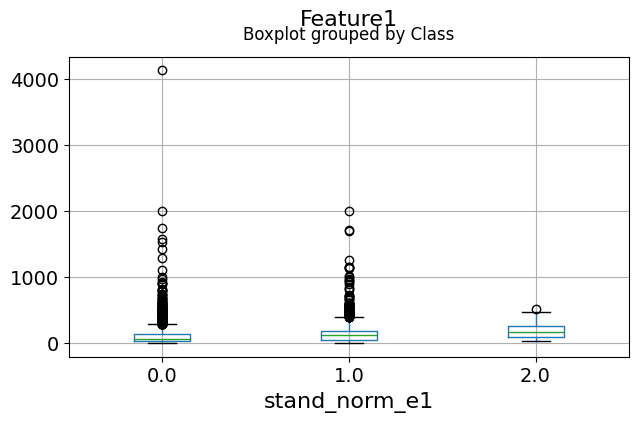

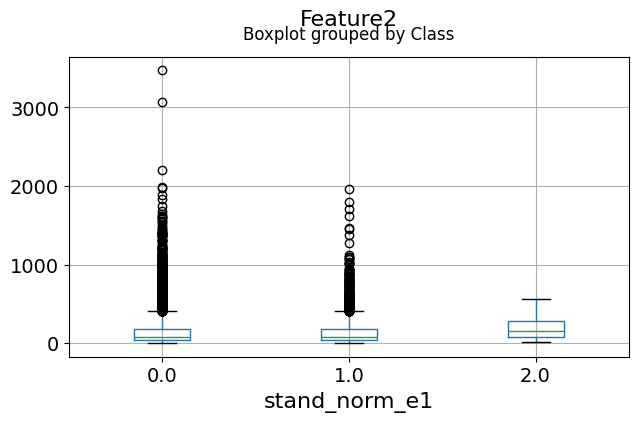

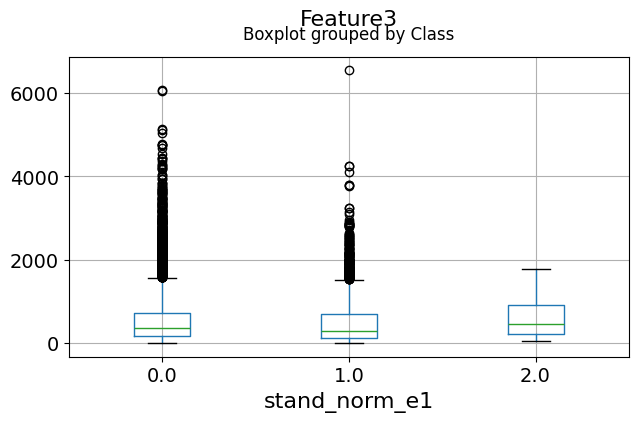

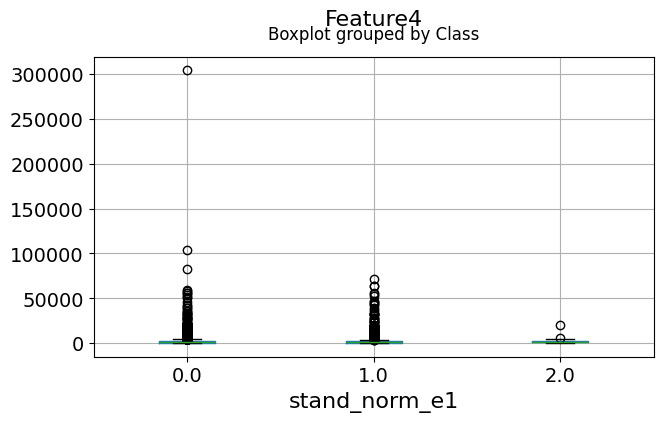

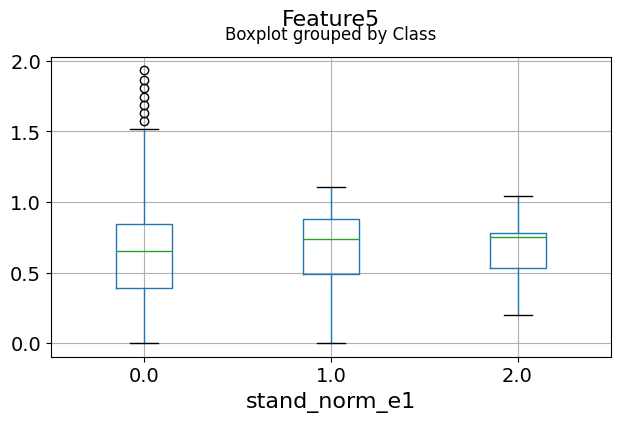

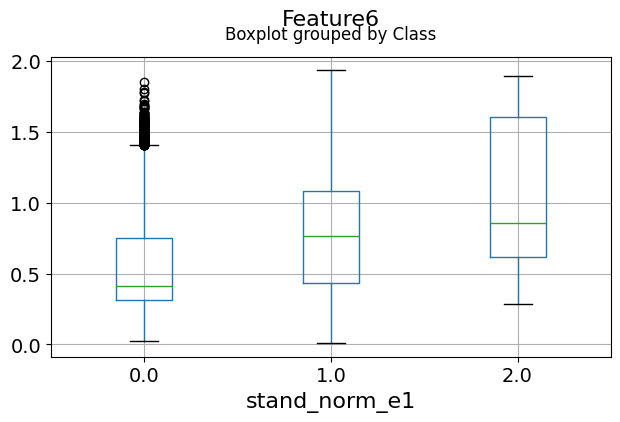

In [22]:
for c in df.columns[1:]:
    df.boxplot(c,by='Class',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("stand_norm_e1", fontsize=16)

#### Are the features independent? Plot co-variance matrix

It can be seen that there are some good amount of correlation between features i.e. they are not independent of each other, as assumed in Naive Bayes technique. However, we will still go ahead and apply yhe classifier to see its performance.

/var/folders/2h/mc0j2yvj7m981sq0zs2tp3zh0000gn/T/ipykernel_3500/2618353917.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet', 30)
/var/folders/2h/mc0j2yvj7m981sq0zs2tp3zh0000gn/T/ipykernel_3500/2618353917.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels,fontsize=9)
/var/folders/2h/mc0j2yvj7m981sq0zs2tp3zh0000gn/T/ipykernel_3500/2618353917.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(labels,fontsize=9)


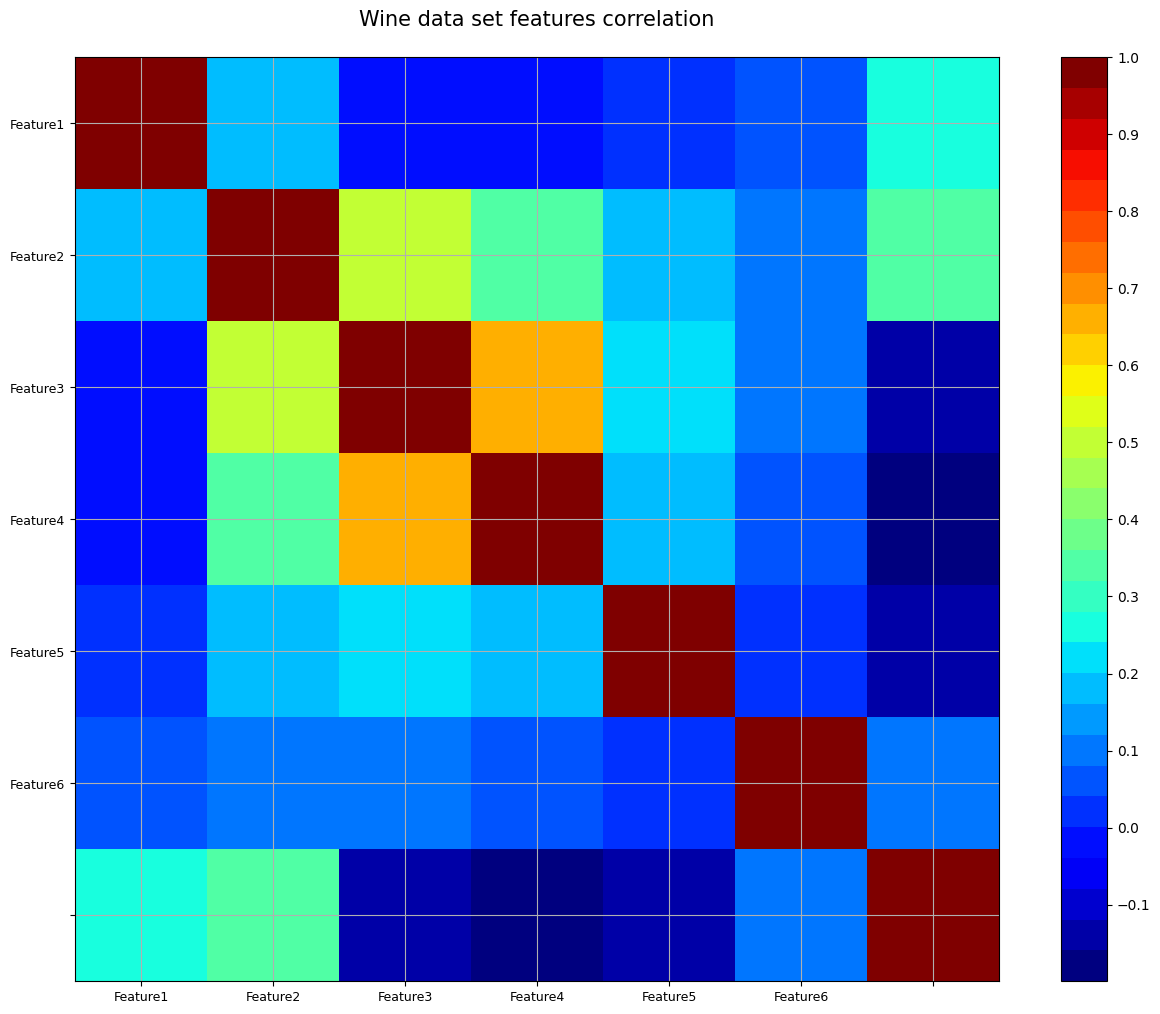

In [29]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Wine data set features correlation\n',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(df)

## Principal Component Analysis

### Data scaling
PCA requires scaling/normalization of the data to work properly

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [26]:
X = df.drop('Class',axis=1)
y = df['Class']

In [27]:
X = scaler.fit_transform(X)

In [28]:
dfx = pd.DataFrame(data=X,columns=df.columns[1:])

In [29]:
dfx.head(10)

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6
0,0.970824,0.170293,0.274755,0.426926,-1.472337,0.567804
1,1.567983,1.104862,0.461386,-0.372693,-1.357793,0.294190
2,1.186121,1.411445,0.702905,0.612796,-1.247275,0.003690
3,1.361419,6.276948,1.598202,0.238281,-1.140696,-0.093861
4,-0.273586,-0.219215,0.850218,0.239331,-1.037967,0.020687
5,0.040955,-0.511584,0.081579,-0.395989,-0.939007,1.200639
6,0.347292,0.010072,-0.286404,-0.281488,-0.843732,1.316762
7,1.712777,-0.210701,0.074656,0.359554,-0.752062,0.544150
8,0.839989,0.497962,0.074816,-0.019508,-0.663910,1.142854
9,1.288661,0.095821,0.243654,-0.071131,-0.579199,0.860117


In [30]:
dfx.describe()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6
count,1.281000e+04,1.281000e+04,1.281000e+04,1.281000e+04,1.281000e+04,1.281000e+04
mean,-1.686222e-16,-7.099881e-17,-1.774970e-17,1.331228e-17,-2.795578e-16,1.419976e-16
std,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00
min,-8.843980e-01,-7.554349e-01,-9.196232e-01,-4.261881e-01,-2.140476e+00,-1.680875e+00
25%,-6.509016e-01,-5.791791e-01,-6.526552e-01,-2.953233e-01,-7.767950e-01,-7.948529e-01
50%,-2.675929e-01,-3.637565e-01,-3.490531e-01,-1.760202e-01,8.358043e-02,-4.076629e-01
75%,3.386244e-01,1.634900e-01,2.882500e-01,3.942799e-02,7.374308e-01,6.710996e-01
max,3.397326e+01,1.668781e+01,1.005253e+01,6.939998e+01,4.327899e+00,3.738486e+00


### PCA class import and analysis

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(n_components=None)

In [14]:
dfx_pca = pca.fit(dfx)

#### Plot the _explained variance ratio_

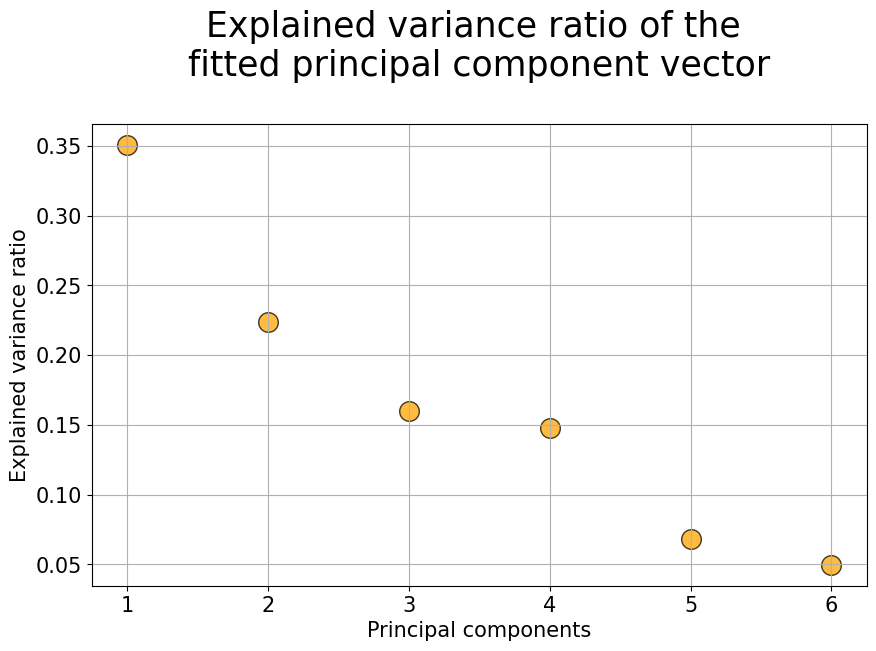

In [33]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

**The above plot means that the $1^{st}$ principal component explains about 36% of the total variance in the data and the $2^{nd}$ component explians further 20%. Therefore, if we just consider first two components, they together explain 56% of the total variance.**

### Showing better class separation using principal components

#### Transform the scaled data set using the fitted PCA object

In [35]:
dfx_trans = pca.transform(dfx)

NotFittedError: This PCA instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

#### Put it in a data frame

In [36]:
dfx_trans = pd.DataFrame(data=dfx_trans)
dfx_trans.head(10)

,0,1,2,3,4,5
0,0.618567,-0.378601,1.705682,0.490012,-0.099390,0.184743
1,1.358775,-0.562555,1.802334,-0.489114,0.554176,0.061059
2,1.823399,0.100855,1.514227,0.186981,0.302188,-0.265036
3,5.242322,0.447794,1.745061,-1.581492,1.169818,-3.252272
4,0.156564,0.579441,0.909128,0.032840,-0.859288,0.233721
5,-0.551198,-0.825862,1.092222,-0.087559,-0.750470,0.020958
6,-0.261331,-1.100539,1.109690,0.041802,-0.288750,-0.362912
7,0.694874,-0.975126,1.169418,0.629034,0.346870,0.810734
8,0.575119,-1.090672,1.039093,0.084076,-0.111833,-0.294618
9,0.649912,-1.108927,1.001756,0.097154,0.030382,0.378876


#### Plot the first two columns of this transformed data set with the color set to original ground truth class label

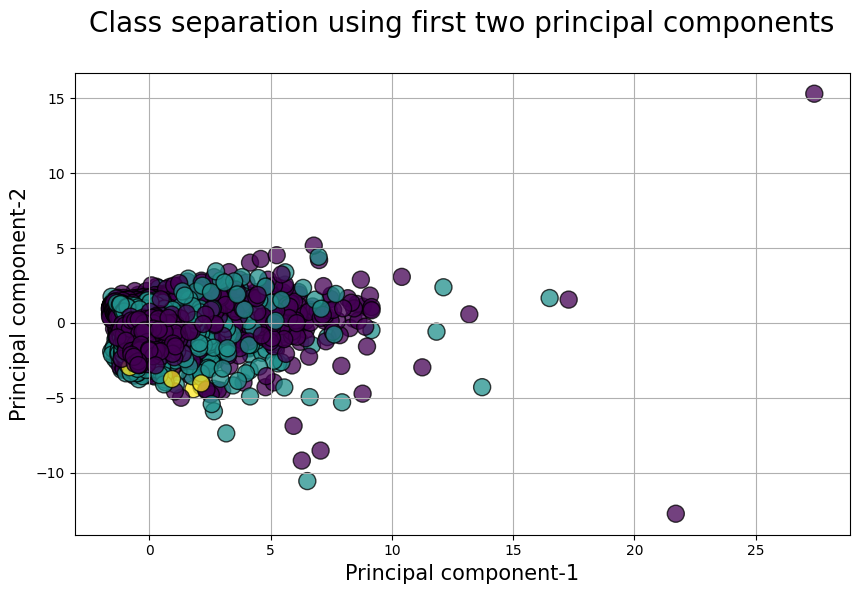

In [37]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=df['Class'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()